In [3]:
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## FLAVOR NETWORK 

### Load data into nxGraph

In [27]:
# Specify the path to your CSV file
csv_file_path = 'data/ingredients.csv'

# Read the edge list from the CSV file with edge attributes (weights)
df = pd.read_csv(csv_file_path)
G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight')

### Exploratory Data Analysis - EDA

##### Connected graph?

In [44]:

print(nx.is_connected(G))

isolated_nodes = list(nx.isolates(G))
print('Isolated nodes:', isolated_nodes)

# Find connected components
connected_components = list(nx.connected_components(G))
print("Number of connected components:", len(connected_components))

for i in range(len(connected_components)):
    print(f'Component {i} --> length {len(connected_components[i])} -- {connected_components[i]}')


False
Isolated nodes: []
Number of connected components: 4
Component 0 --> length 1496 -- {'feijoa', 'armagnac', 'chamaecyparis_pisifera_oil', 'crowberry', 'scotch', 'celery_root', 'orange_peel_oil', 'gin', 'pinus_jeffreyi', 'dill', 'champaca', 'japanese_peppermint', 'sour_milk', 'carphephorus_paniculatus_leaf', 'galbanum_oil', 'calytrix_virgata', 'toasted_oat_groat', 'mashed_potato', 'chamomile_oil', 'jasminum_odoratissimum_oil', 'sauerkraut', 'artemisia_transiliensis', 'robinia_pseudoacacia_oil', 'vetiver', 'abies_sibirica', 'picea_orientalis', 'grain', 'parsnip_root', 'litsea_guatemalensis', 'while_thyme_oil', 'chamaecyparis_formosensis_oil', 'winter_melon', 'seed_oil', 'california_lemon_oil', 'seal', 'asarum_arifolium_root_oil', 'pear_brandy', 'hedychium_spicatum', 'strawberry_wine', 'hinoki', 'potato_chip', 'egg_noodle', 'cassia_oil', 'saigon_cinnamon', 'wild_berry', 'kale', 'red_kidney_bean', 'petitgrain_bigarade', 'pine_oil', 'calytrix_tetragona_oil', 'roasted_almond', 'oxidized

In [47]:
## if we work with the first only...

G_bigCC = G.subgraph(connected_components[0])

##### Clustering coefficients

In [45]:
global_clustering = nx.transitivity(G)
local_clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)

print(global_clustering)
print(local_clustering)
print(avg_clustering)

# Global clustering of 0.64
# Local clustering of 0.85 on average --> how much the neighbors connect among themselves

0.6475286369381289
{'black_sesame_seed': 0.7400731783574586, 'rose_wine': 0.5403531676594407, 'fennel': 0.6401726321857388, 'wild_berry': 0.6146821101248466, 'comte_cheese': 0.5384526043062628, 'grape': 0.5202346823121542, 'nira': 0.8473684210526315, 'raw_beef': 0.5231966814773674, 'corn_mint_oil': 0.6994656719427361, 'parsnip_fruit': 0.9303562743190662, 'soybean': 0.5058634822539805, 'vegetable_oil': 1.0, 'bell_pepper': 0.5284420849542568, 'naranjilla': 0.8018168335187245, 'chervil': 0.880142834963515, 'crayfish': 0.8243592094683238, 'corn_mint': 0.6697101449275362, 'cream_cheese': 0.5429327559244557, 'european_cranberry': 0.5087950795537574, 'thai_pepper': 0.5706141487431977, 'concord_grape': 0.5161264578483012, 'wild_strawberry': 0.6075976711901862, 'black_pepper': 0.5669261000231178, 'gruyere_cheese': 0.49146563987977837, 'prune': 0.7822374939393301, 'prunus': 0.9392057218144174, 'orange': 0.44079339546766333, 'satsuma_mandarin_peel': 0.9336124401913876, 'morus_bombycis_oil': 1.0, 

#### Diameter and average path length

In [70]:
def diameter(G):

    source_node = list(G.nodes)[0]  #randomly selected

    # Calculate shortest paths from the source node to all other nodes
    shortest_paths = nx.single_source_shortest_path_length(G, source=source_node)

    # Find the maximum shortest path length
    diameter = max(shortest_paths.values())

    return diameter
 

print("Diameter of the network:", diameter(G))

## Diameter of 3. I can get to any other ingredient by max 3 edges
## !!!!!!


Diameter of the network: 3


#### Closeness centrality

In [50]:
closeness_centrality =nx.closeness_centrality(G)

In [62]:
# how close or how quickly an individual node can reach all other nodes in the network

# Nodes with high CC are influencial, critical
closeness_centrality

sorted_cc = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
print('Top 20: ', list(sorted_cc.keys())[0:20])

sorted_cc

Top 20:  ['black_tea', 'green_tea', 'roasted_green_tea', 'bantu_beer', 'fermented_tea', 'beer', 'rooibus_tea', 'strawberry', 'ceylon_tea', 'seychelles_tea', 'dried_black_tea', 'dried_green_tea', 'kola_tea', 'pouching_tea', 'tea', 'jasmine_tea', 'fermented_russian_black_tea', 'brewed_tea', 'white_wine', 'israeli_orange']


{'black_tea': 0.740928779473552,
 'green_tea': 0.7325174458467545,
 'roasted_green_tea': 0.7325174458467545,
 'bantu_beer': 0.7274903653360414,
 'fermented_tea': 0.7267778380438416,
 'beer': 0.7264220975455332,
 'rooibus_tea': 0.7260667051299043,
 'strawberry': 0.7257116602863201,
 'ceylon_tea': 0.7257116602863201,
 'seychelles_tea': 0.7257116602863201,
 'dried_black_tea': 0.724294946454624,
 'dried_green_tea': 0.724294946454624,
 'kola_tea': 0.7239416318465973,
 'pouching_tea': 0.7239416318465973,
 'tea': 0.7239416318465973,
 'jasmine_tea': 0.7239416318465973,
 'fermented_russian_black_tea': 0.7239416318465973,
 'brewed_tea': 0.7239416318465973,
 'white_wine': 0.7214780482671486,
 'israeli_orange': 0.7172935453289148,
 'raspberry': 0.7159094767416906,
 'orange': 0.7155642937731556,
 'california_orange': 0.7155642937731556,
 'parmesan_cheese': 0.7053613808391277,
 'gruyere_cheese': 0.7036891158300259,
 'jamaican_rum': 0.7036891158300259,
 'cognac': 0.7026895574268582,
 'rum': 0.7026895

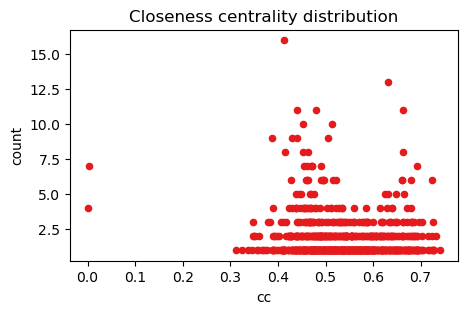

In [82]:
cc = Counter(closeness_centrality.values())
cc = pd.DataFrame(list(cc.items()), columns = ("cc", "count")).sort_values(by = "cc")

cc.plot(kind = "scatter", x = "cc", y = "count", color = "#e41a1c",figsize=(5,3))
plt.title('Closeness centrality distribution')
plt.show()


#meeeehh. no influential points. all have same cc. two dots on the left are
#the three small isolated components. maybe remove

### Average degree

In [74]:
def average_degree(G):
    
    average_degree = nx.average_degree_connectivity(G)
    print("Average degree:", average_degree)

    total_degree = sum(dict(G.degree()).values())
    num_nodes = len(G.nodes())
    average_degree = total_degree / num_nodes

    print("Overall Average Degree:", average_degree)
    print('Number of ingredients:', num_nodes)
    return

average_degree(G)
# Very dense... each ingredient conects on average with 300 other ingredients
# of the network (20% of the network)

Average degree: {487: 592.9445585215606, 814: 489.2911547911548, 514: 543.3696498054475, 745: 522.910067114094, 820: 487.3390243902439, 849: 479.48056537102474, 20: 611.1357142857142, 832: 479.0189903846154, 546: 582.3635531135532, 257: 709.5019455252918, 864: 472.5787037037037, 107: 720.9514018691589, 797: 483.5545796737767, 465: 612.5605734767025, 114: 705.8157894736842, 533: 616.343339587242, 576: 564.3402777777778, 816: 489.86642156862746, 857: 474.5414235705951, 681: 509.057268722467, 853: 475.89996092223527, 752: 518.0873226950355, 684: 513.4130116959064, 887: 465.89853438556935, 534: 613.4016853932584, 253: 674.9130434782609, 920: 442.02934782608696, 209: 688.5684210526316, 198: 699.2734487734488, 694: 537.6440922190202, 434: 659.0956221198156, 942: 446.1050955414013, 120: 702.6416666666667, 881: 460.54370034052215, 458: 574.2423580786026, 27: 636.894586894587, 217: 683.1912442396314, 801: 495.9313358302122, 605: 582.0925619834711, 175: 722.0685714285714, 200: 696.87, 559: 577.3

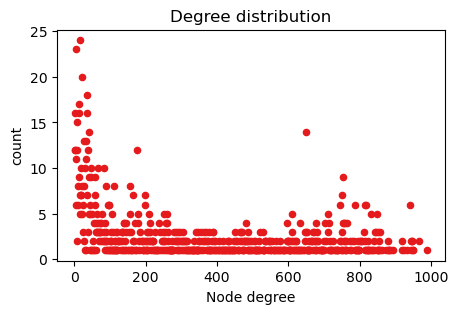

In [81]:
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")

dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", figsize=(5,3))
plt.xlabel('Node degree')
plt.title('Degree distribution')
plt.show()

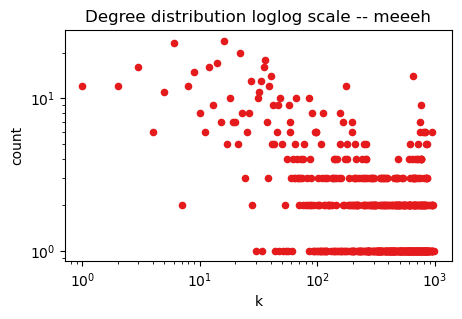

In [83]:
#loglog
dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", loglog= True, figsize=(5,3))
plt.title('Degree distribution loglog scale -- meeeh')
plt.show()

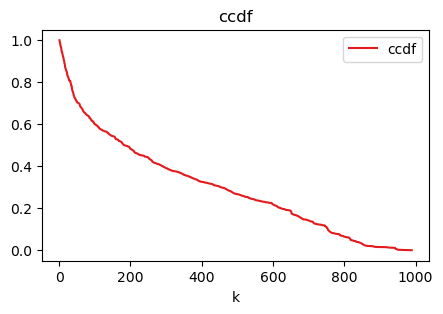

In [87]:
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c",figsize=(5,3))

plt.title('ccdf');

## ASIAN RECIPES

### Read data

In [88]:
file_name = 'data/asian-recipes.csv'

#3590 recipes

